In [1]:
## all imports
from IPython.display import HTML
import chardet
import io
import numpy as np
import os
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup
from time import sleep
import requests
import operator
import socket
import _pickle
import re # regular expressions

from pandas import Series
import pandas as pd
from pandas import DataFrame

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

#from secret import *

### DRAW GRAPHS IN THE NOTEBOOK

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

### LOAD DATA FROM SYSTEM OR WEB

In [3]:
if os.path.isfile("Afl_updated - Sheet1.csv"):
    filepath = "Afl_updated - Sheet1.csv"
    print ("loading from file")
else:
    filepath = "https://docs.google.com/spreadsheets/d/1uN_4ds9T59BicDncCTXqLxSCDtiOxgktCZ8w1vmEPaU/pub?output=csv"
    print ("loading from the internet")

loading from file


### READ CSV FILE

In [5]:
df = pd.read_csv(filepath, infer_datetime_format=True,
                           parse_dates=['Date'],
                           dayfirst=True )
print ("done")

done


### REVIEW FRAME AND SHAPE, COLUMNS

In [6]:
df.head()

,City,Date,Kick Off (local),Home Team,Away Team,Venue,Home Score,Away Score,Home Goals,Home Behinds,Away Goals,Away Behinds,Home Odds,Away Odds,Rain,URL
0,Melbourne,2017-04-16,15:20,Hawthorn,Geelong,MCG,48,134,6,12,20,14,2.87,1.42,NaN,http://www.bom.gov.au/jsp/ncc/cdio/weatherData...
1,Brisbane,2017-04-16,16:40,Brisbane,Richmond,Gabba,67,119,10,7,17,17,3.17,1.35,0.0,http://www.bom.gov.au/jsp/ncc/cdio/weatherData...
2,Melbourne,2017-04-16,15:20,Collingwood,St Kilda,Etihad Stadium,55,69,7,13,9,15,1.62,2.29,NaN,http://www.bom.gov.au/jsp/ncc/cdio/weatherData...
3,Adelaide,2017-04-15,19:10,Adelaide,Essendon,Adelaide Oval,153,88,24,9,13,10,1.16,5.29,0.0,http://www.bom.gov.au/jsp/ncc/cdio/weatherData...
4,Melbourne,2017-04-15,19:25,Carlton,Gold Coast,Etihad Stadium,82,108,12,10,17,6,2.05,1.77,NaN,http://www.bom.gov.au/jsp/ncc/cdio/weatherData...


In [13]:
df.shape

(1544, 16)

In [25]:
df.columns

Index(['City', 'Date', 'Kick Off (local)', 'Home Team', 'Away Team', 'Venue',
       'Home Score', 'Away Score', 'Home Goals', 'Home Behinds', 'Away Goals',
       'Away Behinds', 'Home Odds', 'Away Odds', 'Rain', 'URL', 'Accuracy'],
      dtype='object')

In [26]:
row_one = df.iloc[1]
row_one

City                                                         Adelaide
Date                                              2017-04-15 00:00:00
Kick Off (local)                                                19:10
Home Team                                                    Adelaide
Away Team                                                    Essendon
Venue                                                   Adelaide Oval
Home Score                                                        153
Away Score                                                         88
Home Goals                                                         24
Home Behinds                                                        9
Away Goals                                                         13
Away Behinds                                                       10
Home Odds                                                        1.16
Away Odds                                                        5.29
Rain                

### CREATE SUBSET

### ONLY USE DATA WHERE RAIN HAS A VALUE- ERASE NaN VALUES

ss = penalty_data.loc[:5]

ss["day"] = ss.apply(lambda x: x.OFFENCE_MONTH.day, axis=1)
ss.head(1)

In [24]:
df = df[df.Rain >= 0.0]
df.shape

(1387, 17)

### CONVERT ALL RAIN COLUMN TO FLOAT

In [15]:
df['Rain'].apply(float)

1        0.0
3        0.0
9        0.0
18       0.0
22       0.2
23       0.0
25       2.8
26       2.8
28       0.0
29       0.0
30      34.0
31       0.0
32       0.0
33       2.0
34       0.0
35       0.0
36       0.0
37       0.0
38       0.6
39       0.0
40      15.2
41       0.0
42       2.8
43       0.6
44       8.8
45       7.0
46       0.0
47       0.0
48       1.0
49       0.2
        ... 
1512     0.0
1513     0.0
1515     0.0
1516     0.0
1517     0.8
1519     0.0
1520    13.0
1521     0.0
1522     2.6
1523     0.0
1524     0.0
1525     1.4
1526     0.0
1527     0.0
1528     1.0
1529     0.0
1530     1.4
1531     1.0
1532     6.4
1533     0.0
1534     0.0
1535     0.2
1536    14.8
1537     5.8
1538     0.4
1539     0.0
1540     0.0
1541     8.8
1542     2.6
1543     0.2
Name: Rain, dtype: float64

### USEFUL FILTER SYNTAX

selected_users = users[(users.sex == 'F') & 
                       (users.occupation == 'programmer')]

print selected_users.describe()

print selected_users.age.mean()

print selected_users['age'].mean()

print (total_goals, total_points)

### FINDING RAIN EFFECTED MATCHES WITH >3MM

In [14]:
test = df[df.Rain >= 3.0]
print(test.Rain.count())

230


### DATAFRAME WITH RAIN GREATER THAN ZERO

In [154]:
some_rain = df[df.Rain > 0.1]
some_rain.Rain.count()
#some_rain.head()

569

### DATAFRAME WITH NO RAIN 

In [155]:
no_rain = df[df.Rain == 0.0]
no_rain.Rain.count()
#some_rain.head()

817

### ACCURACY PERCENTAGE

In [156]:
def goal_accuracy (row):
    total_goals = row['Home Goals'] + row['Away Goals']
    total_behinds = row['Home Behinds'] + row['Away Behinds']
    result = total_goals / (total_goals + total_behinds)*100
    #return ("%.2f" % result)
    return (result)
    #print (total_goals, total_points)

In [157]:
df['Accuracy'] = df.apply(goal_accuracy, axis =1)

In [158]:
def home_accuracy (row):
    total_goals = row['Home Goals']
    total_behinds = row['Home Behinds']
    result = total_goals / (total_goals + total_behinds)*100
    #return ("%.2f" % result)
    return (result)
    #print (total_goals, total_points)

In [159]:
df['Home_Accuracy'] = df.apply(home_accuracy, axis =1)

In [160]:
def away_accuracy (row):
    total_goals = row['Away Goals']
    total_behinds = row['Away Behinds']
    result = total_goals / (total_goals + total_behinds)*100
    #return ("%.2f" % result)
    return (result)
    #print (total_goals, total_points)

In [161]:
df['Away_Accuracy'] = df.apply(away_accuracy, axis =1)

In [162]:
df.head(50)

,City,Date,Kick Off (local),Home Team,Away Team,Venue,Home Score,Away Score,Home Goals,Home Behinds,Away Goals,Away Behinds,Home Odds,Away Odds,Rain,URL,Accuracy,Home_Accuracy,Away_Accuracy
1,Brisbane,2017-04-16,16:40,Brisbane,Richmond,Gabba,67,119,10,7,17,17,3.17,1.35,0.0,http://www.bom.gov.au/jsp/ncc/cdio/weatherData...,52.941176,58.823529,50.000000
3,Adelaide,2017-04-15,19:10,Adelaide,Essendon,Adelaide Oval,153,88,24,9,13,10,1.16,5.29,0.0,http://www.bom.gov.au/jsp/ncc/cdio/weatherData...,66.071429,72.727273,56.521739
9,Gold Coast,2017-04-09,16:40,Gold Coast,Hawthorn,Metricon Stadium,139,53,21,13,7,11,3.06,1.38,0.0,http://www.bom.gov.au/jsp/ncc/cdio/weatherData...,53.846154,61.764706,38.888889
18,Adelaide,2017-04-02,16:10,Port Adelaide,Fremantle,Adelaide Oval,145,56,22,13,8,8,1.21,4.50,0.0,http://www.bom.gov.au/jsp/ncc/cdio/weatherData...,58.823529,62.857143,50.000000
22,Brisbane,2017-04-01,18:25,Brisbane,Essendon,Gabba,84,111,12,12,17,9,2.90,1.41,0.2,http://www.bom.gov.au/jsp/ncc/cdio/weatherData...,58.000000,50.000000,65.384615
23,Homebush,2017-04-01,16:35,GWS Giants,Gold Coast,Spotless Stadium,160,58,24,16,8,10,1.12,6.37,0.0,http://www.bom.gov.au/jsp/ncc/cdio/weatherData...,55.172414,60.000000,44.444444
25,Melbourne,2017-03-31,19:50,Western Bulldogs,Sydney,Etihad Stadium,110,87,16,14,13,9,1.39,3.01,2.8,http://www.bom.gov.au/jsp/ncc/cdio/weatherData...,55.769231,53.333333,59.090909
26,Melbourne,2017-03-30,19:20,Richmond,Collingwood,MCG,99,80,14,15,11,14,2.14,1.71,2.8,http://www.bom.gov.au/jsp/ncc/cdio/weatherData...,46.296296,48.275862,44.000000
28,Adelaide,2017-03-26,14:50,Adelaide,GWS Giants,Adelaide Oval,147,91,22,15,14,7,2.25,1.65,0.0,http://www.bom.gov.au/jsp/ncc/cdio/weatherData...,62.068966,59.459459,66.666667
29,Melbourne,2017-03-26,13:10,North Melbourne,West Coast,Etihad Stadium,93,136,13,15,21,10,3.40,1.32,0.0,http://www.bom.gov.au/jsp/ncc/cdio/weatherData...,57.627119,46.428571,67.741935


In [163]:
some_rain.head()

,City,Date,Kick Off (local),Home Team,Away Team,Venue,Home Score,Away Score,Home Goals,Home Behinds,Away Goals,Away Behinds,Home Odds,Away Odds,Rain,URL,Accuracy,Home_Accuracy,Away_Accuracy
22,Brisbane,2017-04-01,18:25,Brisbane,Essendon,Gabba,84,111,12,12,17,9,2.90,1.41,0.2,http://www.bom.gov.au/jsp/ncc/cdio/weatherData...,58.000000,50.000000,65.384615
25,Melbourne,2017-03-31,19:50,Western Bulldogs,Sydney,Etihad Stadium,110,87,16,14,13,9,1.39,3.01,2.8,http://www.bom.gov.au/jsp/ncc/cdio/weatherData...,55.769231,53.333333,59.090909
26,Melbourne,2017-03-30,19:20,Richmond,Collingwood,MCG,99,80,14,15,11,14,2.14,1.71,2.8,http://www.bom.gov.au/jsp/ncc/cdio/weatherData...,46.296296,48.275862,44.000000
30,Gold Coast,2017-03-25,19:05,Gold Coast,Brisbane,Metricon Stadium,96,98,14,12,15,8,1.28,3.67,34.0,http://www.bom.gov.au/jsp/ncc/cdio/weatherData...,59.183673,53.846154,65.217391
33,Sydney,2017-03-25,16:35,Sydney,Port Adelaide,SCG,82,110,12,10,17,8,1.28,3.70,2.0,http://www.bom.gov.au/jsp/ncc/cdio/weatherData...,61.702128,54.545455,68.000000


### SIMPLE PLOT

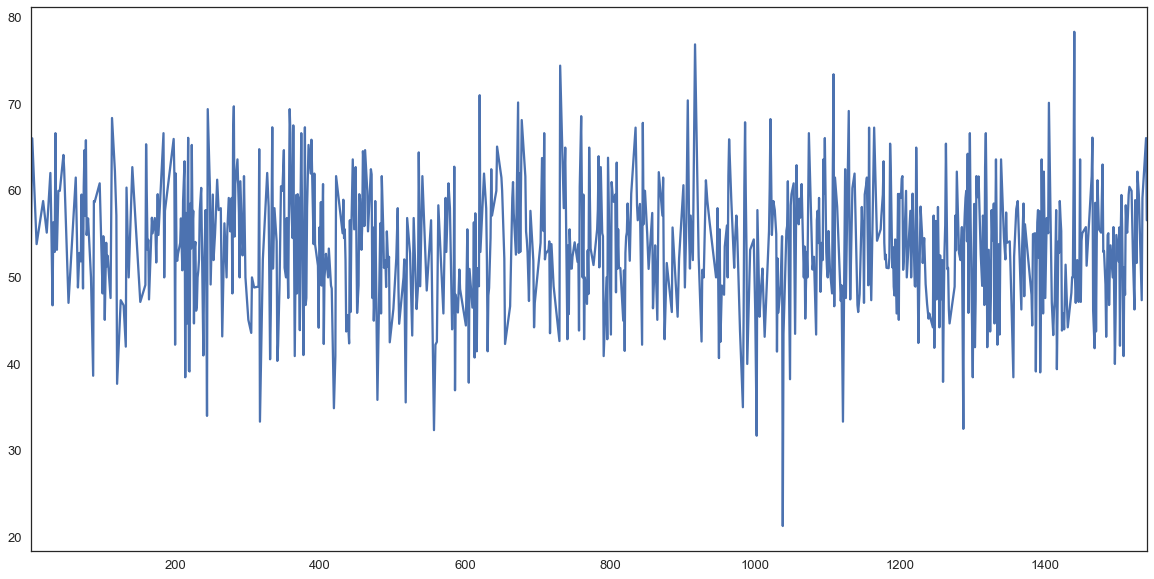

In [103]:
no_rain["Accuracy"].plot()

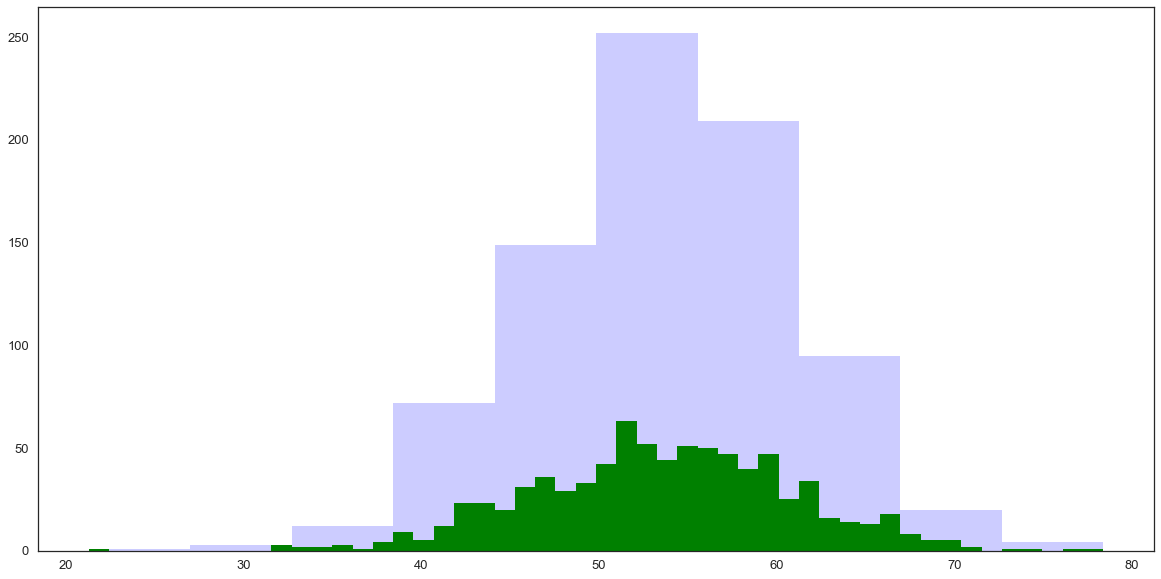

In [77]:
#no_rain['Accuracy'].plot()
rain_data_value = some_rain['Accuracy']

#plt.hist(rain_data_value)
plt.hist(rain_data_value, bins=10, facecolor='blue', alpha=0.2)
plt.hist(rain_data_value, bins=50, facecolor='green', alpha=1)
plt.show()

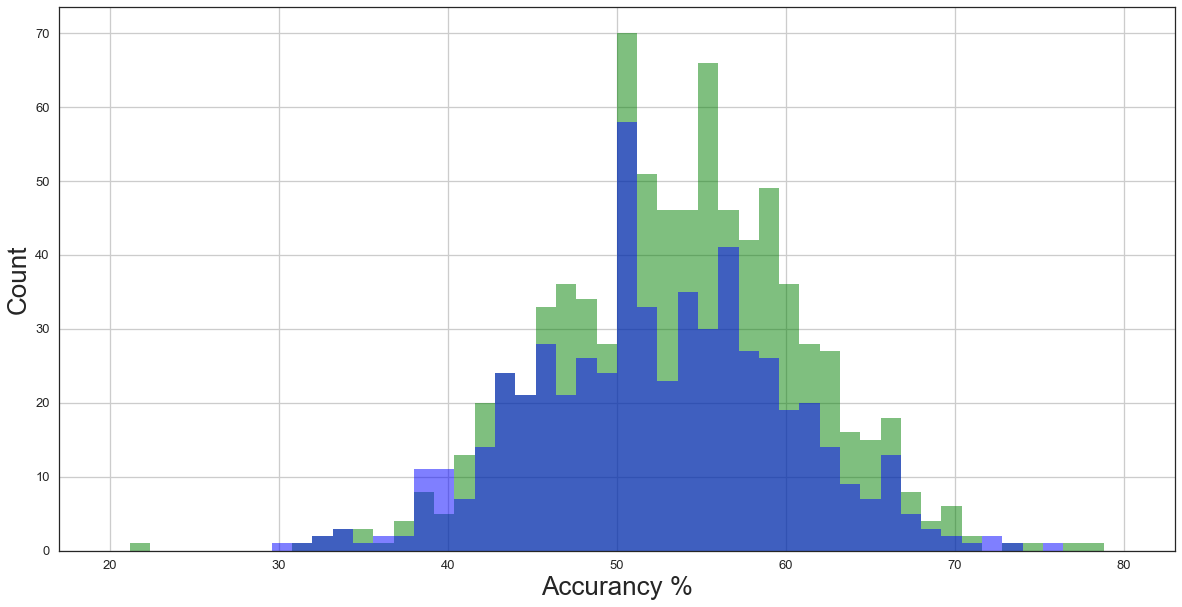

In [117]:
number_of_bins = 50
lower_bound = 20
upper_bound = 80

#data_values = no_rain['Accuracy']

plt.hist(no_rain['Accuracy'], bins=number_of_bins, facecolor='green', alpha=0.5, range=(lower_bound, upper_bound))
plt.hist(some_rain['Accuracy'], bins=number_of_bins, facecolor='blue', alpha=0.5, range=(lower_bound, upper_bound))
#plt.title("Number of fines of a given value issued between {} and {}".format("then", "now"), fontsize=18)
plt.xlabel('Accurancy %', fontsize=26)
plt.ylabel('Count', fontsize=26)
plt.grid(True)

plt.show()

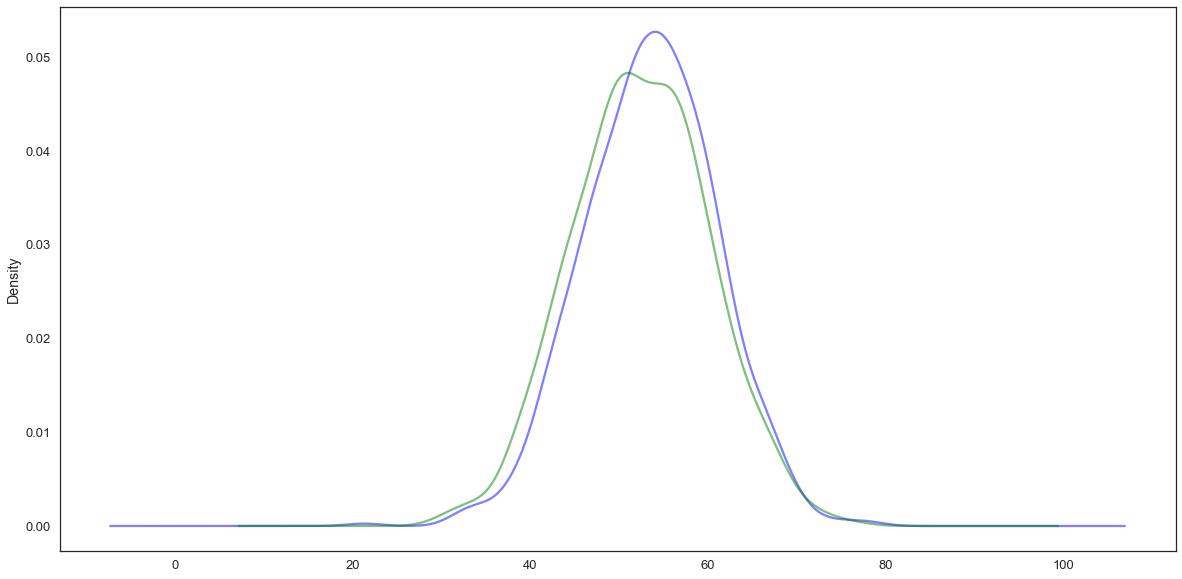

In [164]:
no_rain['Accuracy'].plot.kde(color = "Blue", alpha=0.5)
some_rain['Accuracy'].plot.kde(color = "Green", alpha=0.5)

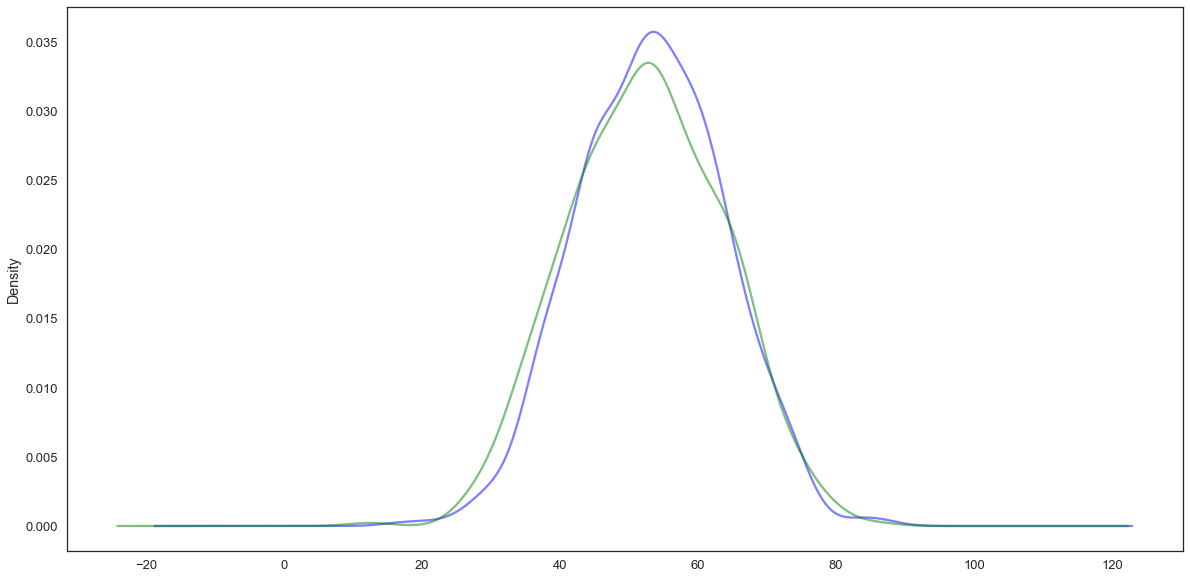

In [167]:
no_rain['Away_Accuracy'].plot.kde(color = "Blue", alpha=0.5)
some_rain['Away_Accuracy'].plot.kde(color = "Green", alpha=0.5)

In [ ]:
accuracy of 

### HISTOGRAM

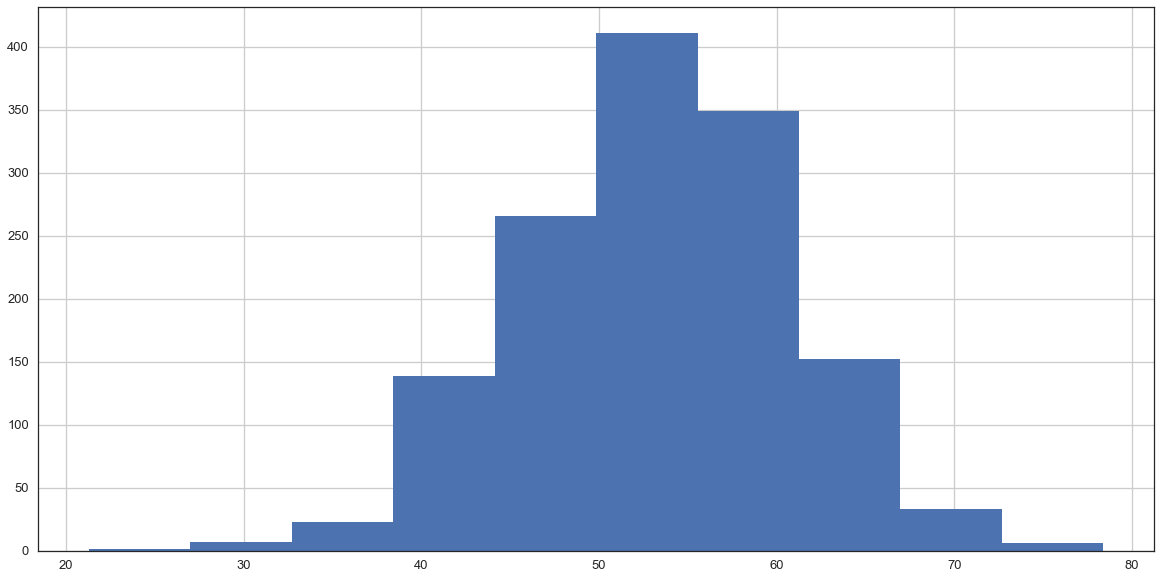

In [35]:
df["Accuracy"].hist()

### BOOLEAN INDEXING

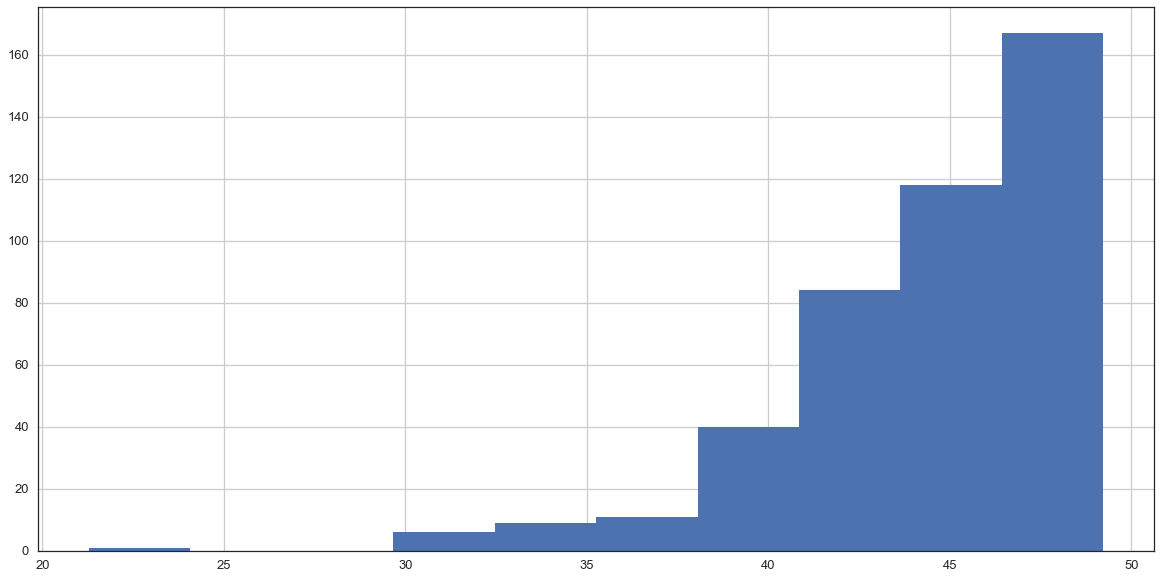

In [37]:
df["Accuracy"][df["Accuracy"] < 50].hist()